In [25]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score



In [26]:

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence

import nltk
import re
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
##TODO

csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_data/liwc_response_train.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_train_data'
Train_df = pd.read_csv(csv_file)
Train_df = Train_df.loc[:, ~Train_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Train_df.head(5)

#These are the most useful features per SHAP 




,verb,funct,auxverb,present,pronoun,ipron,cogmech,certain,ppron,you,social,affect,posemo,conj,tentat,excl,future,discrep,past,motion,relativ,space,preps,incl,adverb,insight,shehe,achieve,negemo,anger,they,cause,article,money,work,percept,hear,swear,time,negate,leisure,death,number,see,sad,quant,anx,assent,bio,health,filler,body,friend,sexual,we,home,feel,inhib,humans,i,family,relig,nonfl,ingest,label,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,response,Response_emotion,Emotional_sim_response/context/0,Emotional_sim_response/context/1,valence_response,arousal_response,dominance_response,tokenized_text
0,7.0,13.0,3.0,5.0,5.0,1.0,6.0,1.0,4.0,3.0,4.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.310345,0.034483,0.172414,0.172414,4.862069,0.167658,0.379310,0.137931,0.204,0.000,0.796,0.87530,I don't get this .. obviously you do car...,sadness,0.082695,0.340227,6.222500,3.695000,5.965000,"['I', 'do', ""n't"", 'get', 'this', '..', 'obvio..."
1,2.0,11.0,1.0,2.0,5.0,1.0,3.0,0.0,4.0,0.0,4.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.250000,0.000000,0.000000,0.166667,5.000000,0.208333,0.166667,0.125000,0.000,0.256,0.744,0.11985,trying to protest about . Talking about hi...,anger,0.016047,0.013105,5.190000,3.713333,5.733333,"['trying', 'to', 'protest', 'about', '.', 'Tal..."
2,1.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.055556,0.000000,0.000000,0.055556,5.777778,0.320988,0.333333,0.222222,0.000,0.176,0.824,0.27130,He makes an insane about of money from t...,anger,0.006215,0.084905,5.246667,5.223333,5.426667,"['He', 'makes', 'an', 'insane', 'about', 'of',..."
3,3.0,9.0,1.0,0.0,4.0,0.0,2.0,1.0,4.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.208333,0.041667,0.166667,0.166667,5.833333,0.243056,0.166667,0.125000,0.000,0.130,0.870,0.24470,Meanwhile Trump won't even release his SAT...,anger,0.124028,0.385647,5.661111,4.428889,5.907778,"['Meanwhile', 'Trump', 'wo', ""n't"", 'even', 'r..."
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.060606,0.030303,0.030303,0.030303,5.575758,0.168962,0.393939,0.090909,0.193,0.000,0.807,0.83525,Pretty Sure the Anti-Lincoln Crowd Claimed...,joy,0.080290,0.009652,5.000000,5.000000,5.000000,"['Pretty', 'Sure', 'the', 'Anti-Lincoln', 'Cro..."


In [5]:
##TODO

csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_data/liwc_response_test.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_test_data'
Test_df = pd.read_csv(csv_file)
Test_df = Test_df.loc[:, ~Test_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Test_df.head(5)



,time,relativ,funct,pronoun,ipron,adverb,cogmech,excl,leisure,conj,incl,verb,past,social,ppron,i,cause,humans,certain,achieve,preps,tentat,space,affect,filler,posemo,present,they,shehe,negemo,anger,quant,auxverb,article,insight,work,you,motion,discrep,assent,inhib,home,percept,hear,anx,sad,see,money,negate,bio,health,sexual,nonfl,future,swear,ingest,feel,number,body,relig,family,we,death,friend,label,noun_count_percent,adj_count_percent,adv_count_percent,pro_count_percent,char_count,word_density,punctuation_count,upper_case_word_count,vader_pos,vader_neg,vader_neu,vader_compound,response,Response_emotion,valence_response,arousal_response,dominance_response,tokenized_text
0,6.0,6.0,19.0,9.0,5.0,3.0,9.0,2.0,2.0,5.0,2.0,2.0,1.0,7.0,4.0,1.0,3.0,1.0,1.0,4.0,3.0,1.0,1.0,4.0,1.0,3.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_SARCASM,0.134328,0.104478,0.089552,0.074627,4.567164,0.068167,0.283582,0.074627,0.147,0.134,0.719,0.71005,"My 3 year old , that just finished readi...",joy,5.671111,4.181667,5.976667,"['My', '3', 'year', 'old', ',', 'that', 'just'..."
1,1.0,1.0,6.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.181818,0.136364,0.045455,0.090909,4.818182,0.219008,0.363636,0.090909,0.215,0.131,0.654,0.60115,How many verifiable lies has he told now ?...,joy,5.442857,3.635714,5.554286,"['How', 'many', 'verifiable', 'lies', 'has', '..."
2,0.0,0.0,7.0,1.0,1.0,1.0,4.0,1.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SARCASM,0.130435,0.043478,0.043478,0.043478,4.695652,0.204159,0.260870,0.173913,0.000,0.000,1.000,0.50000,Maybe Docs just a scrub of a coach ... I...,anger,5.236250,4.210000,5.270000,"['Maybe', 'Docs', 'just', 'a', 'scrub', 'of', ..."
3,0.0,4.0,9.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_SARCASM,0.045455,0.090909,0.045455,0.000000,4.272727,0.194215,0.318182,0.181818,0.000,0.200,0.800,0.19430,is just a cover up for the real hate insid...,anger,5.174000,4.290000,5.474000,"['is', 'just', 'a', 'cover', 'up', 'for', 'the..."
4,0.0,0.0,6.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_SARCASM,0.200000,0.000000,0.133333,0.066667,4.200000,0.280000,0.266667,0.200000,0.000,0.091,0.909,0.47420,The irony being that he even has to ask ...,anger,5.795000,3.630000,5.697500,"['The', 'irony', 'being', 'that', 'he', 'even'..."


In [6]:
X_train = Train_df

X_test= Test_df

y_train= Train_df['label']

y_test = Test_df['label']

In [11]:

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [12]:

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}') # word that appears 1 or more times
count_vect.fit(Train_df['response'])
count_vect.fit(Test_df['response'])
# to show resulting vocabulary; the numbers are not counts, they are the position in the sparse vector.
count_vect.vocabulary_

# transform the training and validation data using count vectorizer object: doc x term
xtrain_count =  count_vect.transform(Train_df['response']) 
xvalid_count =  count_vect.transform(Test_df['response'])



In [18]:
xvalid_count= xvalid_count.toarray()

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
# fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

# predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, y_test),metrics.precision_score(predictions, y_test),metrics.recall_score(predictions, y_test),metrics.f1_score(predictions, y_test)


# Results on Test data

# Naive Bayes


In [19]:
from sklearn.naive_bayes import GaussianNB

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), xtrain_count, y_train, xvalid_count)
print ("NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

NB, :  A: 0.59 P: 0.64 R: 0.58 F1: 0.61


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
accuracy, precision, recall,fl  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), xtrain_count, y_train, xvalid_count)
print ("random Forest: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

random Forest:  A: 0.62 P: 0.71 R: 0.6 F1: 0.61


# SVM

In [22]:
from sklearn.svm import SVC

accuracy, precision, recall,f1  = train_model(svm.SVC(), xtrain_count, y_train, xvalid_count)
print ("Svm: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

Svm:  A: 0.65 P: 0.66 R: 0.65 F1: 0.66


# LogisticRegression

In [23]:


accuracy, precision, recall,f1  = train_model(LogisticRegression(random_state=0,max_iter=500), xtrain_count, y_train, xvalid_count)
print ("Logistic Regression: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

Logistic Regression:  A: 0.66 P: 0.69 R: 0.64 F1: 0.67


# Test on Train data


C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

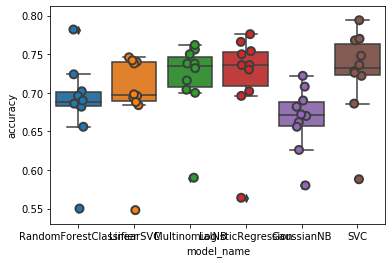

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=500),
    GaussianNB(),
    svm.SVC(),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, xtrain_count, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [21]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB                0.6596
LinearSVC                 0.6628
LogisticRegression        0.6602
MultinomialNB             0.6022
RandomForestClassifier    0.6682
SVC                       0.6490
Name: accuracy, dtype: float64

In [22]:
cv_df.groupby('model_name').accuracy.max()

model_name
GaussianNB                0.726
LinearSVC                 0.724
LogisticRegression        0.724
MultinomialNB             0.688
RandomForestClassifier    0.722
SVC                       0.724
Name: accuracy, dtype: float64

In [23]:
cv_df.groupby('model_name').accuracy.min()

model_name
GaussianNB                0.556
LinearSVC                 0.576
LogisticRegression        0.572
MultinomialNB             0.530
RandomForestClassifier    0.568
SVC                       0.566
Name: accuracy, dtype: float64